In [1]:
import pandas as pd
from matplotlib import pyplot as plt

In [6]:
all_subjects = pd.read_csv('Data/subjects_nan.csv').drop(columns=['Unnamed: 0', "imageid"])
all_subjects

,subject,imgDate,Group,num_events,AERELAD,AERELCM,AERELFLRBTBN,AERELFLRBPR,AEHIMG,AERELTAU,...,FCISCORE,MEDINSTIME,QUES5TIME,SNGLCHKTIME,COMPLXCHKTIME,MMSE_INTERP,MMSE_MEAN,first_mmse_year,concave,convex
0,S6546,2022-10-03,0,4,0.0,0.25,0.0,0.0,0.0,0.0,...,65.000000,11.333333,3.333333,104.0,147.000000,28.000000,27.666667,2005,1631980.0,1.770903e+06
1,S6570,2018-08-31,0,3,0.0,0.00,0.0,0.0,0.0,0.0,...,73.000000,1.000000,1.000000,80.0,124.000000,29.990591,29.000000,2005,1628163.0,1.767325e+06
2,S6570,2022-09-20,0,3,0.0,0.00,0.0,0.0,0.0,0.0,...,73.000000,1.000000,1.000000,80.0,124.000000,28.000000,29.000000,2005,1580466.0,1.704634e+06
3,S6574,2018-09-07,0,5,0.0,0.00,0.0,0.0,0.0,0.0,...,70.666667,13.666667,5.000000,84.0,170.666667,28.027778,29.000000,2005,1477454.0,1.629739e+06
4,S6574,2020-11-02,0,5,0.0,0.00,0.0,0.0,0.0,0.0,...,70.666667,13.666667,5.000000,84.0,170.666667,30.000000,29.000000,2005,1595403.0,1.739119e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,S0300,2008-10-13 16:43:20,2,12,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,26.000000,25.000000,2011,1654017.0,1.797397e+06
1996,S0916,2006-12-03 14:39:25,2,18,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,21.000000,18.000000,2011,1597718.0,1.738169e+06
1997,S1262,2007-08-05 14:09:40,2,14,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,15.784265,12.600000,2010,1601268.0,1.727674e+06
1998,S0404,2006-12-22 19:35:16,2,11,0.0,0.00,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,19.624700,20.250000,2011,1609039.0,1.749592e+06


In [8]:
len(all_subjects["subject"].unique())

594

In [20]:
print("\n".join(all_subjects.columns))

subject
imgDate
Group
num_events
AERELAD
AERELCM
AERELFLRBTBN
AERELFLRBPR
AEHIMG
AERELTAU
AERELNAV
AERELMK
AERELPI
AEHLUMB
AERELCOVID
AERELPAN
AERELATESP
AEHCMEDS
AESERIOUS
No med
Aricept
Cognex
Exelon
Namenda
Razadyne
Anti-depressant
Other med
Num_visits
med_unknown
med_aspirin
med_multivitamin
med_calcium
med_aricept
med_namenda
med_fish
med_vitamin b
med_vitamin c
med_vitamin d
med_simvastatin
med_glucosamine
med_lipitor
med_vitamin e
med_tylenol
med_lisinopril
med_levothyroxine
med_ibuprofen
med_asa
med_vitamin d3
med_hydrochlorothiazide
med_omeprazole
med_folic acid
med_synthroid
med_atenolol
med_metoprolol
med_omega 3
med_metformin
med_prednisone
med_flomax
SIBDEMENT
Num_siblings
MOTHDEM
FATHDEM
MOTHAGE
FATHAGE
PXGENAPP
PXHEADEY
PXNECK
PXCHEST
PXHEART
PXABDOM
PXEXTREM
PXEDEMA
PXPERIPH
PXSKIN
PXMUSCUL
PXBACK
PXOTHER
PXABNORM
PTSOURCE
PTGENDER
PTDOBYY
PTHAND
PTMARRY
PTEDUCAT
PTNOTRT
PTRTYR
PTHOME
PTCOGBEG
PTADDX
PTETHCAT
PTRACCAT
VSWEIGHT
VSHEIGHT
VSBPSYS
VSBPDIA
VSPULSE
VSRESP
VST

In [56]:
# Replace values in the DataFrame
replaced_df = all_subjects.copy()
# Remove subject duplicates
# replaced_df = replaced_df.drop_duplicates(subset=["subject"])
replaced_df["Group"] = replaced_df["Group"].replace({0: "CN", 1: "MCI", 2: "AD"})
replaced_df["PTGENDER"] = replaced_df["PTGENDER"].replace({1: "Male", 2: "Female"})

# Group and count
grouped_counts1 = replaced_df.groupby(["Group", "PTGENDER"])[["subject"]].count()
print(grouped_counts1.to_latex())
grouped_counts1

\begin{tabular}{llr}
\toprule
 &  & subject \\
Group & PTGENDER &  \\
\midrule
\multirow[t]{2}{*}{AD} & Female & 132 \\
 & Male & 81 \\
\cline{1-3}
\multirow[t]{2}{*}{CN} & Female & 780 \\
 & Male & 546 \\
\cline{1-3}
\multirow[t]{2}{*}{MCI} & Female & 145 \\
 & Male & 316 \\
\cline{1-3}
\bottomrule
\end{tabular}



subject
Group PTGENDER         
AD    Female        132
      Male           81
CN    Female        780
      Male          546
MCI   Female        145
      Male          316

In [61]:
print(pd.concat([grouped_counts1,grouped_counts], axis=1).to_latex())

\begin{tabular}{llrr}
\toprule
 &  & subject & subject \\
Group & PTGENDER &  &  \\
\midrule
\multirow[t]{2}{*}{AD} & Female & 132 & 16 \\
 & Male & 81 & 8 \\
\cline{1-4}
\multirow[t]{2}{*}{CN} & Female & 780 & 303 \\
 & Male & 546 & 210 \\
\cline{1-4}
\multirow[t]{2}{*}{MCI} & Female & 145 & 20 \\
 & Male & 316 & 37 \\
\cline{1-4}
\bottomrule
\end{tabular}



In [50]:
all_subjects["Age"] = all_subjects["first_mmse_year"] - all_subjects["PTDOBYY"]

In [22]:
all_subjects["PTEDUCAT"]

0       20.0
1       18.0
2       18.0
3       16.0
4       16.0
        ... 
1995    16.0
1996    16.0
1997    12.0
1998    14.0
1999    16.0
Name: PTEDUCAT, Length: 2000, dtype: float64

In [48]:
all_subjects["AD+"] = all_subjects["Group"] == 2

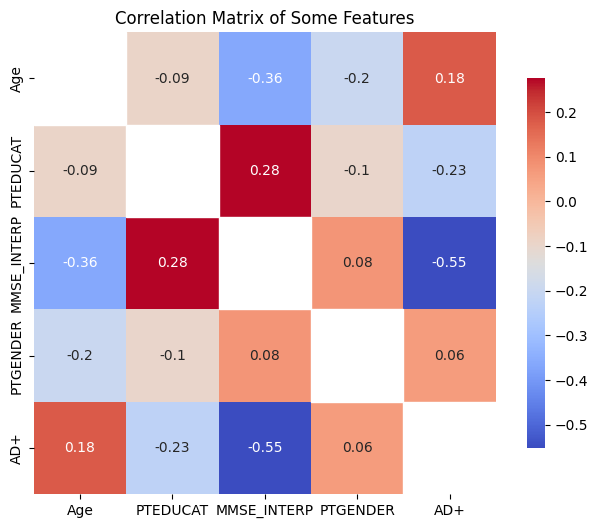

In [64]:
features = ["Age", "PTEDUCAT", "MMSE_INTERP", "PTGENDER","AD+"]

# Create corr matrix
corr = all_subjects[features].corr()
import numpy as np
np.fill_diagonal(corr.values, 0)

# Plot the heatmap usins seaborn
import seaborn as sns

# Generate the base heatmap with annotations, except for the diagonal
annot = corr.round(2).astype(str).values
np.fill_diagonal(annot, "")  # Leave diagonal blank for now

mask = np.eye(len(corr), dtype=bool)

plt.figure(figsize=(8, 6))
sns.heatmap(
    corr,
    annot=annot,
    fmt="",
    cmap='coolwarm',
    square=True,
    cbar_kws={"shrink": .8},
    mask=mask  # mask the diagonal
)

# Overlay a white square on the diagonal cells
for i in range(len(corr)):
    plt.gca().add_patch(plt.Rectangle((i, i), 1, 1, color='white', ec='white'))
plt.title("Correlation Matrix of Some Features")
plt.show()